<a href="https://colab.research.google.com/github/madara1128/Cinnemon-Classification/blob/main/cinnemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets



In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/madaraweerasingha/srilanka-cinnemon")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: madaraweerasingha
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/madaraweerasingha/srilanka-cinnemon


100%|██████████| 15.8M/15.8M [00:00<00:00, 1.06GB/s]

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE =(128,128)

In [ ]:
train_data_dir="/content/srilanka-cinnemon/cinnamon_dataset/train"
test_data_dir="/content/srilanka-cinnemon/cinnamon_dataset/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,subset='training',validation_split=0.1,seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,subset='validation',validation_split=0.1,seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE)

Found 23 files belonging to 2 classes.
Using 21 files for training.
Found 23 files belonging to 2 classes.
Using 2 files for validation.
Found 23 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cassia', 'ceylon']

In [ ]:
for image_batch, lable_batch in train_data.take(1):
  print(image_batch.shape)
  print(lable_batch.shape)

(21, 128, 128, 3)
(21,)


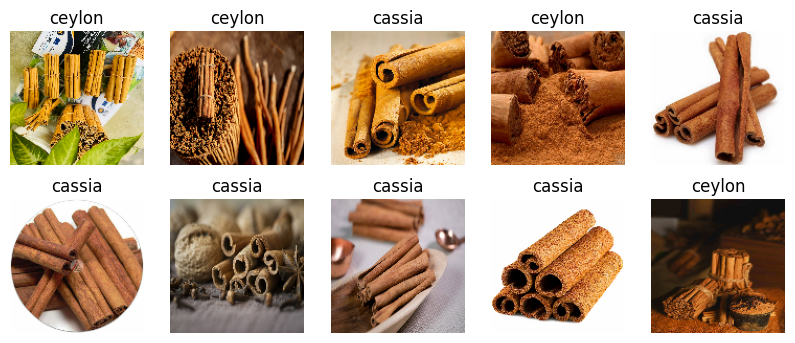

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image,lable in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[lable[i]])
    plt.axis('off')

In [ ]:
for image,lable in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[2.18125000e+02 1.51125000e+02 1.08125000e+02]
   [2.13812500e+02 1.45812500e+02 1.08812500e+02]
   [2.05812500e+02 1.37812500e+02 1.00812500e+02]
   ...
   [2.36000000e+02 2.41000000e+02 2.44000000e+02]
   [2.41000000e+02 2.46000000e+02 2.49000000e+02]
   [2.48000000e+02 2.47000000e+02 2.52000000e+02]]

  [[2.08375000e+02 1.41375000e+02 9.83750000e+01]
   [1.98500000e+02 1.30500000e+02 9.35000000e+01]
   [1.88875000e+02 1.20875000e+02 8.38750000e+01]
   ...
   [2.36000000e+02 2.41000000e+02 2.44000000e+02]
   [2.41000000e+02 2.46000000e+02 2.49000000e+02]
   [2.48000000e+02 2.47000000e+02 2.52000000e+02]]

  [[1.97019531e+02 1.29019531e+02 9.20195312e+01]
   [1.85121094e+02 1.17121094e+02 8.01210938e+01]
   [1.72472656e+02 1.08472656e+02 7.34726562e+01]
   ...
   [2.39000000e+02 2.44000000e+02 2.47000000e+02]
   [2.45000000e+02 2.44000000e+02 2.49000000e+02]
   [2.48000000e+02 2.47000000e+02 2.52000000e+02]]

  ...

  [[4.23320312e+01 3.23554688e+01 3.01875000e+01]
   [8

In [ ]:
train_data = train_data.map(lambda x, y: (x / 255.0, y))
validation_data = validation_data.map(lambda x, y: (x / 255.0, y))
test_data = test_data.map(lambda x, y: (x / 255.0, y))


In [ ]:
for image,lable in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   ...
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]]

  [[2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   ...
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]]

  [[2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   ...
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2.18490212e-22 2.18490212e-22 2.18490212e-22]]

  ...

  [[2.18490212e-22 2.18490212e-22 2.18490212e-22]
   [2

In [ ]:
data_augmentation = tf.keras.Sequential(
    [tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
     tf.keras.layers.RandomRotation(0.2),
     tf.keras.layers.RandomZoom(0.2),]
)

In [ ]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)


In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4286 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.5238 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.6667 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.5714 - loss: 0.6898 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step - accuracy: 0.5714 - loss: 0.6842 - val_accuracy: 0.5000 - val_loss: 0.6962
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 0.6849 - val_accuracy: 0.5000 - val_loss: 0.6993
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - accuracy: 0.5714 - loss: 0.6855 - val_accuracy: 0.5000 - val_loss: 0.7045
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.5714 - loss: 0.6766 - val_accuracy: 0.5000 - val_loss: 0.710

In [ ]:
history.history

{'accuracy': [0.4285714328289032,
  0.523809552192688,
  0.6666666865348816,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.6666666865348816,
  0.6666666865348816,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.5714285969734192,
  0.523809552192688],
 'loss': [0.6931471824645996,
  0.6926797032356262,
  0.6920884251594543,
  0.6897839307785034,
  0.6842288374900818,
  0.6848995685577393,
  0.6855491399765015,
  0.6765750050544739,
  0.6761552095413208,
  0.6812233924865723,
  0.6778461933135986,
  0.6838173866271973,
  0.6908167004585266,
  0.6739007830619812,
  0.6747081279754639,
  0.6666169762611389,
  0.6730546355247498,
  0.6864373683929443,
  0.6931407451629639,
  0.7052014470100403],
 'val_accuracy': [0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,


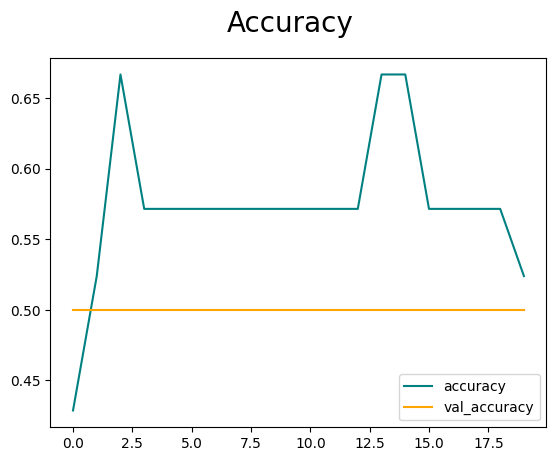

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()


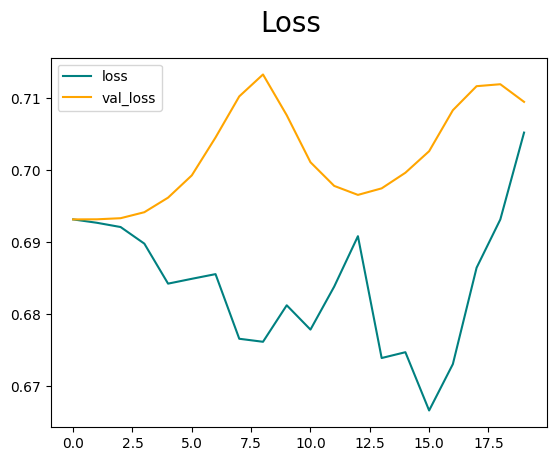

In [ ]:

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()


In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()



In [ ]:
for batch in test_data.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5652173757553101>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5652173757553101>

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

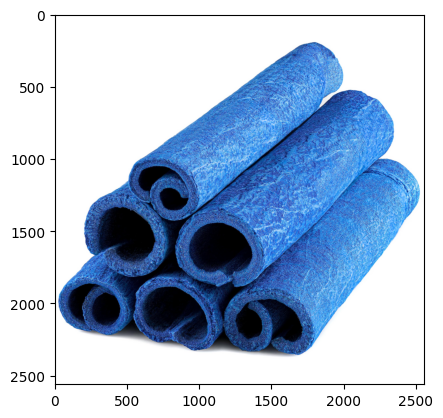

In [136]:
image = cv2.imread("/content/srilanka-cinnemon/cinnamon_dataset/test/cassia/A1wShxzc3VL.jpg")
plt.imshow(image)
plt.show()

In [137]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [138]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [139]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [140]:
y_hat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [141]:
y_hat

array([[0.6723988]], dtype=float32)

In [134]:
class_names

['cassia', 'ceylon']

In [142]:
if y_hat >= 0.63903:
  print(class_names[1])
else:
    print(class_names[0])

ceylon
